<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/DivisiveNewYorkCityTaxiTripDuration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NewYorkCityTaxiTripDuration.csv")
df = df.sample(n=100, random_state=42)

In [7]:
df.isna().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [8]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

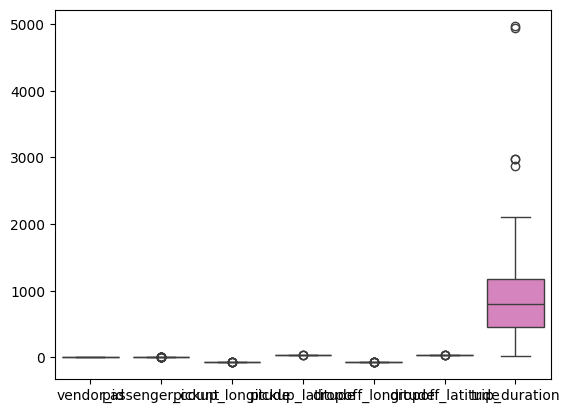

In [9]:
import seaborn as sns
sns.boxplot(df)

In [10]:
import pandas as pd

# Example for pickup_latitude
Q1 = df['pickup_latitude'].quantile(0.25)
Q3 = df['pickup_latitude'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['pickup_latitude'] >= lower) &
        (df['pickup_latitude'] <= upper)]


<Axes: >

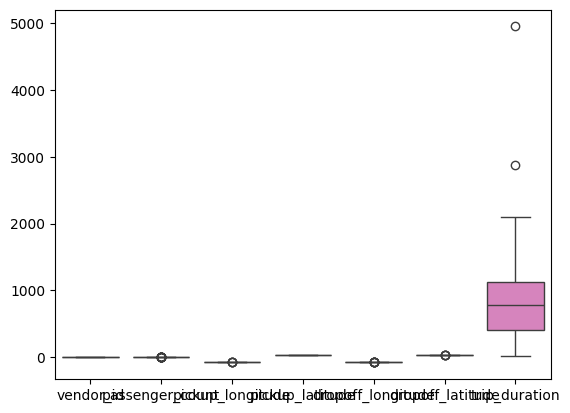

In [11]:
import seaborn as sns
sns.boxplot(df)

In [12]:
# Extract required columns
x = df[['pickup_latitude', 'pickup_longitude']]

print(x.head())


         pickup_latitude  pickup_longitude
67250          40.735943        -73.985611
1397036        40.764351        -73.978394
1021087        40.744389        -73.989059
951424         40.731136        -73.990326
1432685        40.768570        -73.969833


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print(x_scaled[:5])


[[-0.80235385 -0.28611638]
 [ 0.55771412  0.02278684]
 [-0.39800438 -0.43371072]
 [-1.03247144 -0.48791573]
 [ 0.75970622  0.38916042]]


In [14]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=0.2, min_samples=5)
labels_1 = db1.fit_predict(x_scaled)


In [15]:
db2 = DBSCAN(eps=0.3, min_samples=5)
labels_2 = db2.fit_predict(x_scaled)


In [16]:
db3 = DBSCAN(eps=0.5, min_samples=5)
labels_3 = db3.fit_predict(x_scaled)


In [22]:
import numpy as np

def evaluate_clusters(labels, name):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_points = list(labels).count(-1)
    noise_ratio = noise_points / len(labels)

    print(f"\n{name}")
    print("Number of clusters (excluding noise):", n_clusters)
    print("Number of noise points:", noise_points)
    print("Noise ratio:", round(noise_ratio, 4))


In [21]:
from sklearn.metrics import silhouette_score

def compute_silhouette(x_scaled, labels, name):
    mask = labels != -1
    unique_clusters = set(labels[mask])

    if len(unique_clusters) > 1:
        score = silhouette_score(x_scaled[mask], labels[mask])
        print(f"{name} Silhouette Score:", round(score, 4))
    else:
        print(f"{name} Silhouette Score: Not Applicable")

compute_silhouette(x_scaled, labels_1, "Experiment 1")
compute_silhouette(x_scaled, labels_2, "Experiment 2")
compute_silhouette(x_scaled, labels_3, "Experiment 3")


Experiment 1 Silhouette Score: 0.4118
Experiment 2 Silhouette Score: 0.5353
Experiment 3 Silhouette Score: 0.4702


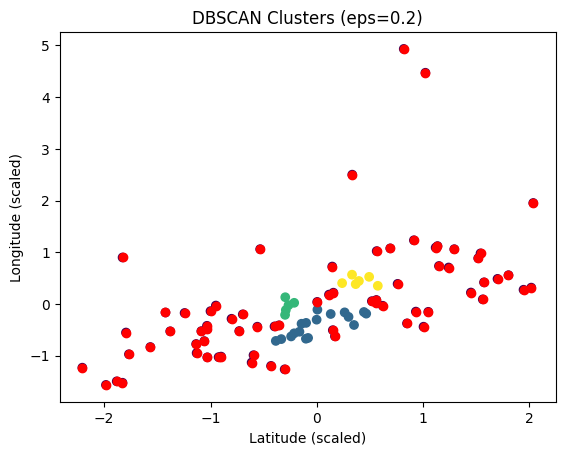

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels_1)

# Highlight noise separately
noise_mask = labels_1 == -1
plt.scatter(x_scaled[noise_mask, 0],
            x_scaled[noise_mask, 1],
            color='red')

plt.title("DBSCAN Clusters (eps=0.2)")
plt.xlabel("Latitude (scaled)")
plt.ylabel("Longitude (scaled)")
plt.show()


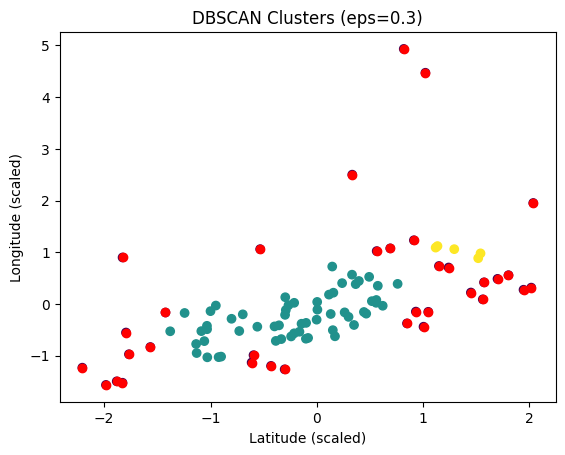

In [26]:
plt.figure()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels_2)

noise_mask = labels_2 == -1
plt.scatter(x_scaled[noise_mask, 0],
            x_scaled[noise_mask, 1],
            color='red')

plt.title("DBSCAN Clusters (eps=0.3)")
plt.xlabel("Latitude (scaled)")
plt.ylabel("Longitude (scaled)")
plt.show()


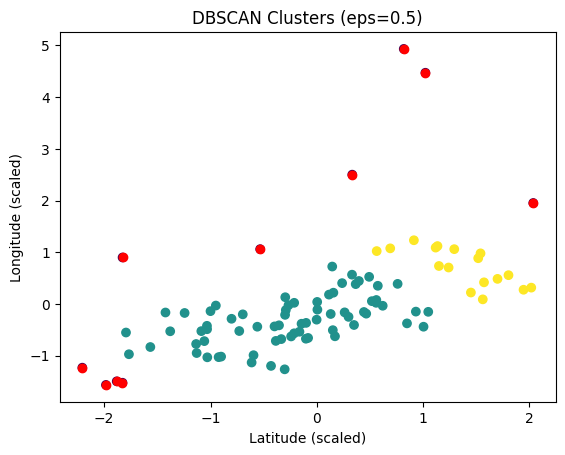

In [27]:
plt.figure()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels_3)

noise_mask = labels_3 == -1
plt.scatter(x_scaled[noise_mask, 0],
            x_scaled[noise_mask, 1],
            color='red')

plt.title("DBSCAN Clusters (eps=0.5)")
plt.xlabel("Latitude (scaled)")
plt.ylabel("Longitude (scaled)")
plt.show()
